In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [ ]:
!sudo apt-get update
!sudo apt-get install -y xvfb

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 129 kB in 2s (71.8 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Don

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

# Task 1: TD(0)

In [ ]:
# Discretization
def discretize_state(state, bins):

  position_bin = np.digitize(state[0], bins[0])
  velocity_bin = np.digitize(state[1], bins[1])

  return (position_bin, velocity_bin)

bins = [
  np.linspace(-1.2, 0.6, 20),
  np.linspace(-0.07, 0.07, 20)
]

Reward using trained policy: -150.0


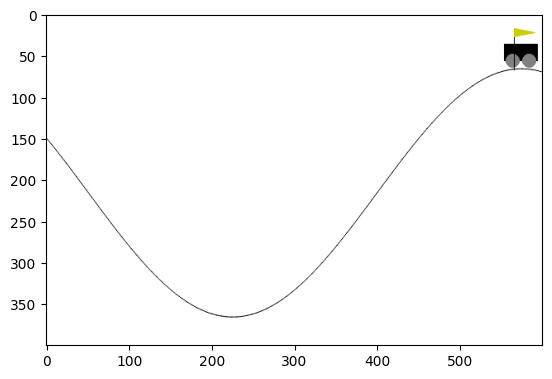

In [ ]:
# on-policy SARSA
env = gym.make("MountainCar-v0")
stateSpaceSize = (len(bins[0])+1, len(bins[1])+1)
actionSpaceSize = env.action_space.n
Q = np.zeros(stateSpaceSize + (actionSpaceSize,))
# hyperparameters
gamma, episodes, alpha, epsilon = 0.99, 10000, 0.1, 0.1

for episode in range(episodes):
  state = env.reset()
  state = discretize_state(state, bins)
  done = False

  # choose A from S using epsilon-greedy policy derived from Q
  if np.random.rand() < epsilon:
    action = np.random.choice(actionSpaceSize)
  else:
    action = np.argmax(Q[state])

  while not done:
    next_state, reward, done, _ = env.step(action)
    next_state = discretize_state(next_state, bins)
    # choose A' from S' using epsilon-greedy policy derived from Q (on-policy)
    if np.random.rand() < epsilon:
      next_action = np.random.choice(actionSpaceSize)
    else:
      next_action = np.argmax(Q[next_state])
    Q[state][action] += alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])
    state, action = next_state, next_action

state = env.reset()
state = discretize_state(state, bins)
done = False
i, total_reward = 0, 0
while not done:
  env.render()
  action = np.argmax(Q[state])
  print("step i",i,"action=",action)
  i += 1
  state, reward, done, info = env.step(action)
  print("obs=",state,"reward=",reward,"done=",done,"info=",info)
  screen = env.render(mode='rgb_array')
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())
  state = discretize_state(state, bins)
  total_reward += reward
ipythondisplay.clear_output(wait=True)
print('Reward using trained policy:', total_reward)
env.close()

Reward using trained policy: -154.0


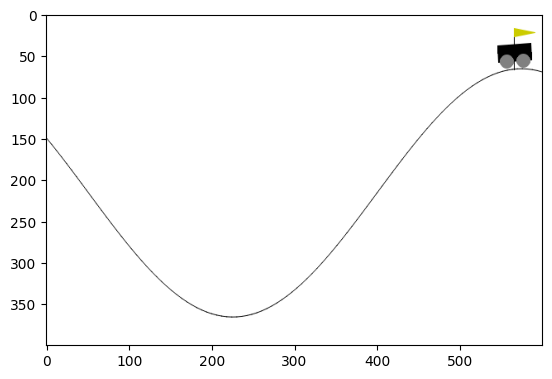

In [ ]:
# off-policy Q learning
env = gym.make("MountainCar-v0")
stateSpaceSize = (len(bins[0])+1, len(bins[1])+1)
actionSpaceSize = env.action_space.n
# as the initialization of Q can be arbitrary and the terminal state should be zero, here I directly initialize it to be all zero.
Q = np.zeros(stateSpaceSize + (actionSpaceSize,))
# hyperparameters
gamma, episodes, alpha, epsilon = 0.99, 10000, 0.1, 0.1

for episode in range(episodes):
  state = env.reset()
  state = discretize_state(state, bins)
  done = False

  while not done:
    if np.random.rand() < epsilon:
      action = np.random.choice(actionSpaceSize)
    else:
      action = np.argmax(Q[state])
    next_state, reward, done, _ = env.step(action)
    next_state = discretize_state(next_state, bins)
    # compute max Q(S') (off-policy Q-learning)
    max_next_Q = np.max(Q[next_state])
    Q[state][action] += alpha * (reward + gamma * max_next_Q - Q[state][action])
    state = next_state

state = env.reset()
state = discretize_state(state, bins)
done = False
i, total_reward = 0, 0
while not done:
  env.render()
  action = np.argmax(Q[state])
  print("step i",i,"action=",action)
  i += 1
  state, reward, done, info = env.step(action)
  print("obs=",state,"reward=",reward,"done=",done,"info=",info)
  screen = env.render(mode='rgb_array')
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())
  state = discretize_state(state, bins)
  total_reward += reward
ipythondisplay.clear_output(wait=True)
print('Reward using trained policy:', total_reward)
env.close()

Reward using trained policy: -128.0


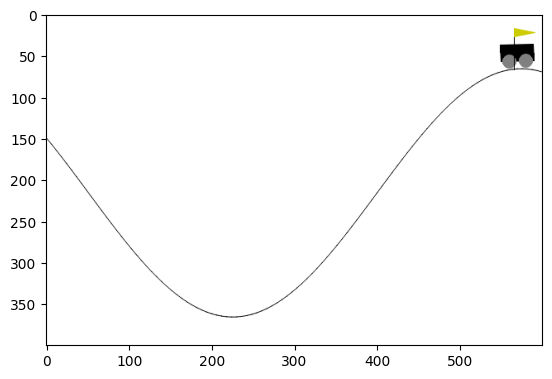

In [ ]:
# off-policy expected SARSA with an epsilon-greedy policy
env = gym.make("MountainCar-v0")
stateSpaceSize = (len(bins[0])+1, len(bins[1])+1)
actionSpaceSize = env.action_space.n
Q = np.zeros(stateSpaceSize + (actionSpaceSize,))
# hyperparameters
gamma, episodes, alpha, epsilon = 0.99, 10000, 0.1, 0.1

for episode in range(episodes):
  state = env.reset()
  state = discretize_state(state, bins)
  done = False

  while not done:
    # epsilon-greedy
    if np.random.rand() < epsilon:
      action = np.random.choice(actionSpaceSize)
    else:
      action = np.argmax(Q[state])
    next_state, reward, done, _ = env.step(action)
    next_state = discretize_state(next_state, bins)
    # e-SARSA (off-policy)
    expected_Q = 0
    for next_action in range(actionSpaceSize):
      if next_action == np.argmax(Q[next_state]):
        expected_Q += (1 - epsilon + epsilon / actionSpaceSize) * Q[next_state][next_action]
      else:
        expected_Q += (epsilon / actionSpaceSize) * Q[next_state][next_action]
    Q[state][action] += alpha * (reward + gamma * expected_Q - Q[state][action])
    state = next_state

state = env.reset()
state = discretize_state(state, bins)
done = False
i, total_reward = 0, 0
while not done:
  env.render()
  action = np.argmax(Q[state])
  print("step i",i,"action=",action)
  i += 1
  state, reward, done, info = env.step(action)
  print("obs=",state,"reward=",reward,"done=",done,"info=",info)
  screen = env.render(mode='rgb_array')
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())
  state = discretize_state(state, bins)
  total_reward += reward
ipythondisplay.clear_output(wait=True)
print('Reward using trained policy:', total_reward)
env.close()

| | On-policy SARSA | Off-policy Q learning | Off-policy expected SARSA with an epsilon-greedy policy |
|---|---|---|---|
| Reward | -150 | -154 | -128 |


For task 1, I slightly adapted my codes from last assignment for CartPole-v0 (mainly discretization and initialization).
Model performances are also similar to that in the last assignment, i.e. on-policy SARSA and off-policy Q learning have similar performance, while off-policy expected SARSA with an epsilon-greedy policy performs best.
After 10,000 episodes, all three controllers aboved succeeded in reaching the target within 200 steps.
It is quite surprising that I haven't changed the hyperparameters (alpha, gamma, and epsilon = 0.99, 0.1, 0.1)，which shows the robustness of the algorithms (and the similarities between two environments).

# Task 2: TD(n)

Reward using trained policy: -110.0


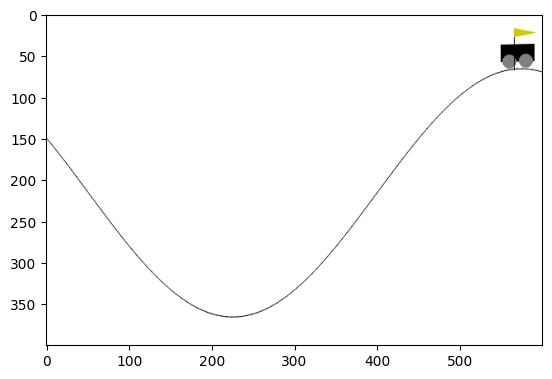

In [ ]:
# TD(2)
env = gym.make("MountainCar-v0")
stateSpaceSize = (len(bins[0])+1, len(bins[1])+1)
actionSpaceSize = env.action_space.n
Q = np.zeros(stateSpaceSize + (actionSpaceSize,))
# hyperparameters
gamma, episodes, alpha, epsilon, n = 0.99, 10000, 0.1, 0.1, 2

for episode in range(episodes):
  state = env.reset()
  state = discretize_state(state, bins)
  done = False

  # choose A from S using epsilon-greedy policy derived from Q
  if np.random.rand() < epsilon:
    action = np.random.choice(actionSpaceSize)
  else:
    action = np.argmax(Q[state])

  # trajectory
  states, actions, rewards = [state], [action], [0]

  # terminal time step
  T = float('inf')
  t = 0
  while True:
    if t < T:
      next_state, reward, done, _ = env.step(action)
      next_state = discretize_state(next_state, bins)
      states.append(next_state)
      rewards.append(reward)
      if done:
        T = t+1
      else:
        if np.random.rand() < epsilon:
          next_action = np.random.choice(actionSpaceSize)
        else:
          next_action = np.argmax(Q[next_state])
        actions.append(next_action)
        action = next_action

    # update time step
    tau = t-n+1
    if tau >= 0:
      G = 0
      for i in range(tau+1, min(tau+n, T) + 1):
        G += (gamma ** (i-tau-1)) * rewards[i]
      if tau + n < T:
        G += (gamma ** n) * Q[states[tau+n]][actions[tau+n]]
      Q[states[tau]][actions[tau]] += alpha * (G - Q[states[tau]][actions[tau]])

    if tau == T-1:
      break
    t += 1

state = env.reset()
state = discretize_state(state, bins)
done = False
i, total_reward = 0, 0
while not done:
  env.render()
  action = np.argmax(Q[state])
  print("step i",i,"action=",action)
  i += 1
  state, reward, done, info = env.step(action)
  print("obs=",state,"reward=",reward,"done=",done,"info=",info)
  screen = env.render(mode='rgb_array')
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())
  state = discretize_state(state, bins)
  total_reward += reward
ipythondisplay.clear_output(wait=True)
print('Reward using trained policy:', total_reward)
env.close()

Reward using trained policy: -149.0


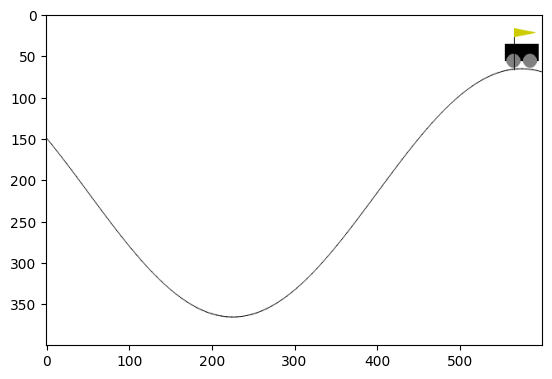

In [ ]:
# TD(3)
env = gym.make("MountainCar-v0")
stateSpaceSize = (len(bins[0])+1, len(bins[1])+1)
actionSpaceSize = env.action_space.n
Q = np.zeros(stateSpaceSize + (actionSpaceSize,))
# hyperparameters
gamma, episodes, alpha, epsilon, n = 0.99, 10000, 0.1, 0.1, 3

for episode in range(episodes):
  state = env.reset()
  state = discretize_state(state, bins)
  done = False

  # choose A from S using epsilon-greedy policy derived from Q
  if np.random.rand() < epsilon:
    action = np.random.choice(actionSpaceSize)
  else:
    action = np.argmax(Q[state])

  # trajectory
  states, actions, rewards = [state], [action], [0]

  # terminal time step
  T = float('inf')
  t = 0
  while True:
    if t < T:
      next_state, reward, done, _ = env.step(action)
      next_state = discretize_state(next_state, bins)
      states.append(next_state)
      rewards.append(reward)
      if done:
        T = t+1
      else:
        if np.random.rand() < epsilon:
          next_action = np.random.choice(actionSpaceSize)
        else:
          next_action = np.argmax(Q[next_state])
        actions.append(next_action)
        action = next_action

    # update time step
    tau = t-n+1
    if tau >= 0:
      G = 0
      for i in range(tau+1, min(tau+n, T) + 1):
        G += (gamma ** (i-tau-1)) * rewards[i]
      if tau + n < T:
        G += (gamma ** n) * Q[states[tau+n]][actions[tau+n]]
      Q[states[tau]][actions[tau]] += alpha * (G - Q[states[tau]][actions[tau]])

    if tau == T-1:
      break
    t += 1

state = env.reset()
state = discretize_state(state, bins)
done = False
i, total_reward = 0, 0
while not done:
  env.render()
  action = np.argmax(Q[state])
  print("step i",i,"action=",action)
  i += 1
  state, reward, done, info = env.step(action)
  print("obs=",state,"reward=",reward,"done=",done,"info=",info)
  screen = env.render(mode='rgb_array')
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())
  state = discretize_state(state, bins)
  total_reward += reward
ipythondisplay.clear_output(wait=True)
print('Reward using trained policy:', total_reward)
env.close()

Reward using trained policy: -115.0


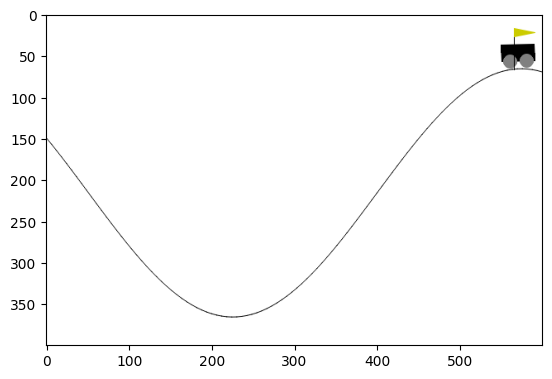

In [ ]:
# TD(4)
env = gym.make("MountainCar-v0")
stateSpaceSize = (len(bins[0])+1, len(bins[1])+1)
actionSpaceSize = env.action_space.n
Q = np.zeros(stateSpaceSize + (actionSpaceSize,))
# hyperparameters
gamma, episodes, alpha, epsilon, n = 0.99, 10000, 0.1, 0.1, 4

for episode in range(episodes):
  state = env.reset()
  state = discretize_state(state, bins)
  done = False

  # choose A from S using epsilon-greedy policy derived from Q
  if np.random.rand() < epsilon:
    action = np.random.choice(actionSpaceSize)
  else:
    action = np.argmax(Q[state])

  # trajectory
  states, actions, rewards = [state], [action], [0]

  # terminal time step
  T = float('inf')
  t = 0
  while True:
    if t < T:
      next_state, reward, done, _ = env.step(action)
      next_state = discretize_state(next_state, bins)
      states.append(next_state)
      rewards.append(reward)
      if done:
        T = t+1
      else:
        if np.random.rand() < epsilon:
          next_action = np.random.choice(actionSpaceSize)
        else:
          next_action = np.argmax(Q[next_state])
        actions.append(next_action)
        action = next_action

    # update time step
    tau = t-n+1
    if tau >= 0:
      G = 0
      for i in range(tau+1, min(tau+n, T) + 1):
        G += (gamma ** (i-tau-1)) * rewards[i]
      if tau + n < T:
        G += (gamma ** n) * Q[states[tau+n]][actions[tau+n]]
      Q[states[tau]][actions[tau]] += alpha * (G - Q[states[tau]][actions[tau]])

    if tau == T-1:
      break
    t += 1

state = env.reset()
state = discretize_state(state, bins)
done = False
i, total_reward = 0, 0
while not done:
  env.render()
  action = np.argmax(Q[state])
  print("step i",i,"action=",action)
  i += 1
  state, reward, done, info = env.step(action)
  print("obs=",state,"reward=",reward,"done=",done,"info=",info)
  screen = env.render(mode='rgb_array')
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())
  state = discretize_state(state, bins)
  total_reward += reward
ipythondisplay.clear_output(wait=True)
print('Reward using trained policy:', total_reward)
env.close()

| | 2-step SARSA | 3-step SARSA | 4-step SARSA |
|---|---|---|---|
| Reward | -110 | -149 | -115 |

For task 2, we know that n-step SARSA takes the benefits of both 1-step SARSA and MC.
As expected, TD(n) has performed better than TD(0) in general with same episodes(10,000) and hyperparameters (alpha, gamma, epsilon = 0.99, 0.1, 0.1).
Meanwhile, TD(3) has performed worse comparing to both TD(2) and TD(4) (I have runned the code several times), maybe this 'awkward' step length fails to capture long-term feature and introduces noise.
And it also shows the importance of proper step length choosing.
The advantage of TD(n) over TD(0) mainly comes from its ability to consider multiple future steps when updating the value function, which makes its update of Q more reasonable.